# Importando


In [1]:
import matplotlib.pyplot as plt
import pandas as pd   
import seaborn as sns
import warnings
from gambis import ColabOuCode

warnings.filterwarnings('ignore')

In [3]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/dados_tratados.csv'
local = './data/dados_tratados.csv'

df = ColabOuCode(
    drive,
    local,
    ncolunas=50000
)

df.shape    

Mounted at /content/drive


(2770409, 8)

# Classificações

In [4]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.combine import SMOTEENN

## Separando e balanceando os dados

In [5]:
from sklearn.model_selection import train_test_split

x_df = df.drop('isFraud',axis=1)
y_df = df[['isFraud']]

X_treino, X_teste, y_treino, y_teste = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [6]:
sennComb = SMOTEENN(
    sampling_strategy=0.5,
    random_state=42,
    n_jobs=-1
)

X_comb, y_comb = sennComb.fit_resample(X_treino, y_treino)


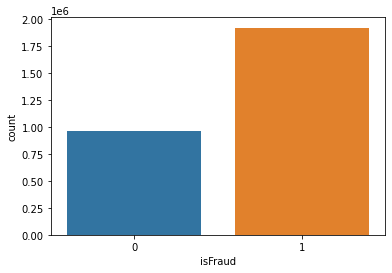

In [6]:
sns.countplot(y_comb['isFraud'])

## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

arvoreDecisao = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=500
)
arvoreDecisao.fit(X_comb, y_comb)

y_arvPred = arvoreDecisao.predict(X_teste)

confusion_matrix(y_teste, y_arvPred)


array([[  2311,    185],
       [  3304, 825323]])

In [8]:
print(classification_report(y_teste, y_arvPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.41      0.93      0.57      2496
  Nao Fraude       1.00      1.00      1.00    828627

    accuracy                           1.00    831123
   macro avg       0.71      0.96      0.78    831123
weighted avg       1.00      1.00      1.00    831123



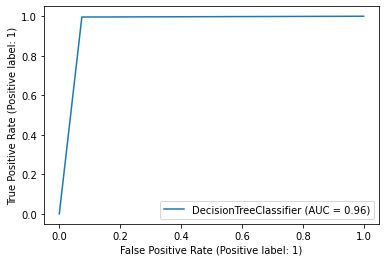

In [9]:
plot_roc_curve(arvoreDecisao, X_teste, y_teste,)
plt.show()

## Random Forest


In [19]:
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier(
    n_estimators=200,
    max_depth=13,
)

randForest.fit(X_comb, y_comb)

y_arvRandPred = randForest.predict(X_teste)

confusion_matrix(y_teste, y_arvRandPred)


array([[  2401,     95],
       [ 16482, 812145]])

In [20]:
print(classification_report(y_teste, y_arvRandPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.13      0.96      0.22      2496
  Nao Fraude       1.00      0.98      0.99    828627

    accuracy                           0.98    831123
   macro avg       0.56      0.97      0.61    831123
weighted avg       1.00      0.98      0.99    831123



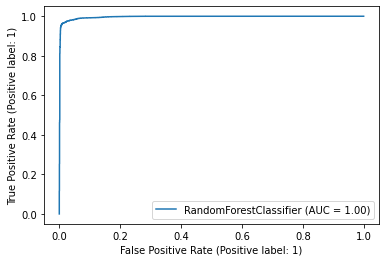

In [21]:
plot_roc_curve(randForest, X_teste, y_teste,)
plt.show()

## XGBoost

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=10,
    max_depth=13,
    subsample=0.75,
    gpu_id='0',
    tree_method='gpu_hist'

)

xgb.fit(X_comb, y_comb) 
y_xgb = xgb.predict(X_teste)

confusion_matrix(y_teste, y_xgb)

array([[  2468,     28],
       [ 16210, 812417]])

In [27]:
print(classification_report(y_teste, y_xgb, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.13      0.99      0.23      2496
  Nao Fraude       1.00      0.98      0.99    828627

    accuracy                           0.98    831123
   macro avg       0.57      0.98      0.61    831123
weighted avg       1.00      0.98      0.99    831123



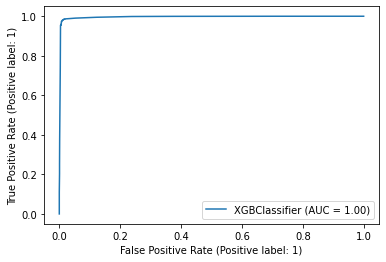

In [28]:
plot_roc_curve(xgb, X_teste, y_teste)
plt.show()